## Importing necessary libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Load the Data

In [2]:
df=pd.read_csv("Country-data.csv")

In [3]:
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [4]:
## As there is no target variable, it is an unsupervised learning problem, hence we can use 
## k-means clustering (all features 9 are continuous)

In [5]:
## df.shape
## no. of unique countries

In [6]:
df.shape

(167, 10)

In [7]:
df.country.nunique()

167

In [8]:
## Problem Statement
## Here we need to categorise the countries on the basis of their economical condition

## As per the business we need 3 categories
## 1. Developed Country
## 2. Developing Country
## 3. Underdeveloped Country

## Preprocessing Data

In [9]:
df.isnull().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

In [10]:
## Dropping the country column as it is not a feature
df1=df.drop("country",axis=1)

## Scaling

In [11]:
from sklearn.preprocessing import MinMaxScaler
mx=MinMaxScaler()
df1_scaled=mx.fit_transform(df1)

In [12]:
df1_scaled

array([[0.42648491, 0.04948197, 0.35860783, ..., 0.47534517, 0.73659306,
        0.00307343],
       [0.06815969, 0.13953104, 0.29459291, ..., 0.87179487, 0.07886435,
        0.03683341],
       [0.12025316, 0.1915594 , 0.14667495, ..., 0.87573964, 0.27444795,
        0.04036499],
       ...,
       [0.10077897, 0.35965101, 0.31261653, ..., 0.8086785 , 0.12618297,
        0.01029885],
       [0.26144109, 0.1495365 , 0.20944686, ..., 0.69822485, 0.55520505,
        0.01029885],
       [0.39191821, 0.18455558, 0.25357365, ..., 0.39250493, 0.670347  ,
        0.01173057]])

## Modelling

In [13]:
from sklearn.cluster import KMeans

## Elbow Method

In [17]:
ssd=[]
for k in range(2,10):
    kmeans=KMeans(n_clusters=k)
    kmeans.fit(df1_scaled)
    ssd.append([k,kmeans.inertia_])#inertia_ gives me the error

In [18]:
ssd=pd.DataFrame(ssd)
ssd.columns=["No. of Clusters","Error"]
ssd

,No. of Clusters,Error
0,2,25.940376
1,3,19.345119
2,4,16.781003
3,5,15.058322
4,6,13.611087
5,7,12.679188
6,8,11.555691
7,9,10.769514


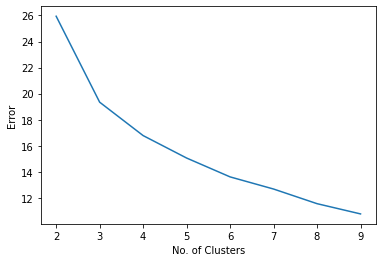

In [19]:
plt.plot(ssd["No. of Clusters"],ssd["Error"])
plt.xlabel("No. of Clusters")
plt.ylabel("Error")
plt.show()

In [20]:
## Number of clusters = 3 (satisfies both business as well as statistical requirement)

## Final Modelling

In [21]:
k=3
kmeans=KMeans(n_clusters=k)
kmeans.fit(df1_scaled)

KMeans(n_clusters=3)

In [22]:
output=kmeans.predict(df1_scaled)

In [23]:
output

array([1, 0, 0, 1, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 2, 0, 1, 0, 0, 0, 0,
       0, 2, 0, 1, 1, 0, 1, 2, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 2, 2,
       2, 0, 0, 0, 0, 1, 1, 0, 0, 2, 2, 1, 1, 0, 2, 1, 2, 0, 0, 1, 1, 0,
       1, 0, 2, 0, 0, 0, 1, 2, 2, 2, 0, 2, 0, 0, 1, 1, 2, 0, 1, 0, 0, 1,
       1, 0, 0, 2, 0, 1, 1, 0, 0, 1, 2, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       2, 2, 1, 1, 2, 0, 1, 0, 0, 0, 0, 0, 2, 2, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 2, 0, 2, 1, 0, 2, 2, 0, 0, 1, 0, 2, 2, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 2, 2, 2, 0, 0, 0, 0, 0, 1, 1], dtype=int32)

In [24]:
df["Clusters"]=output

In [25]:
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Clusters
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,1
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,0
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,0
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,1
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,0


## Iterpreting the Clustering Results


<AxesSubplot:xlabel='Clusters', ylabel='gdpp'>

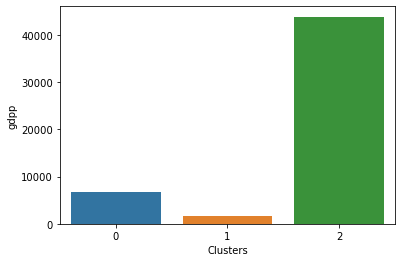

In [27]:
sns.barplot(x=df["Clusters"],y=df["gdpp"],ci=None)
## 0--> Developing Countries
## 1--> Underdeveloped Countries
## 2--> Developed Countries

<AxesSubplot:xlabel='Clusters', ylabel='income'>

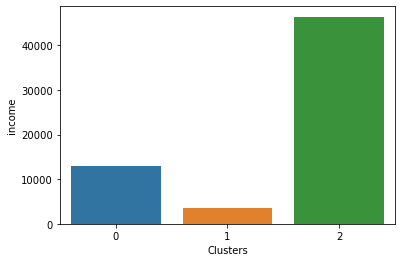

In [28]:
sns.barplot(x=df["Clusters"],y=df["income"],ci=None)
## 0--> Developing Countries
## 1--> Underdeveloped Countries
## 2--> Developed Countries

<AxesSubplot:xlabel='Clusters', ylabel='child_mort'>

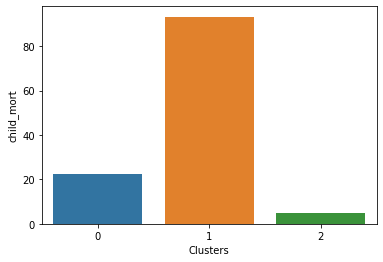

In [29]:
sns.barplot(x=df["Clusters"],y=df["child_mort"],ci=None)
## 0--> Developing Countries
## 1--> Underdeveloped Countries
## 2--> Developed Countries

<AxesSubplot:xlabel='Clusters', ylabel='inflation'>

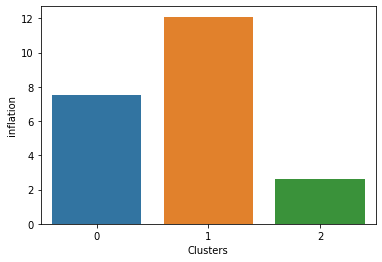

In [30]:
sns.barplot(x=df["Clusters"],y=df["inflation"],ci=None)
## 0--> Developing Countries
## 1--> Underdeveloped Countries
## 2--> Developed Countries

In [33]:
df["health"]=df["health"]*df["gdpp"]
df["imports"]=df["imports"]*df["gdpp"]
df["exports"]=df["exports"]*df["gdpp"]

<AxesSubplot:xlabel='Clusters', ylabel='health'>

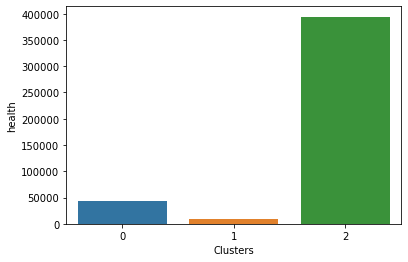

In [34]:
sns.barplot(x=df["Clusters"],y=df["health"],ci=None)
## 0--> Developing Countries
## 1--> Underdeveloped Countries
## 2--> Developed Countries

<AxesSubplot:xlabel='Clusters', ylabel='imports'>

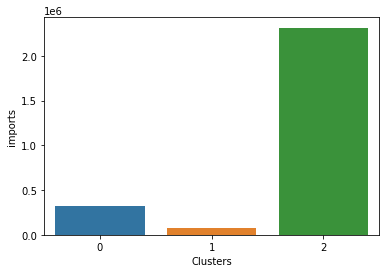

In [35]:
sns.barplot(x=df["Clusters"],y=df["imports"],ci=None)
## 0--> Developing Countries
## 1--> Underdeveloped Countries
## 2--> Developed Countries

<AxesSubplot:xlabel='Clusters', ylabel='exports'>

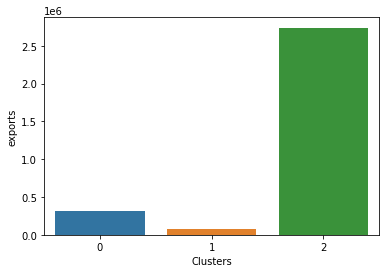

In [36]:
sns.barplot(x=df["Clusters"],y=df["exports"],ci=None)
## 0--> Developing Countries
## 1--> Underdeveloped Countries
## 2--> Developed Countries

<AxesSubplot:xlabel='Clusters', ylabel='life_expec'>

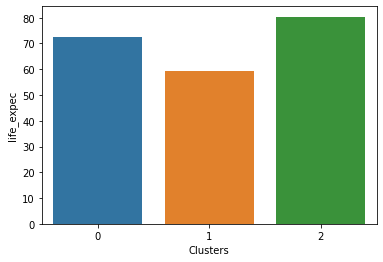

In [37]:
sns.barplot(x=df["Clusters"],y=df["life_expec"],ci=None)
## 0--> Developing Countries
## 1--> Underdeveloped Countries
## 2--> Developed Countries

<AxesSubplot:xlabel='Clusters', ylabel='total_fer'>

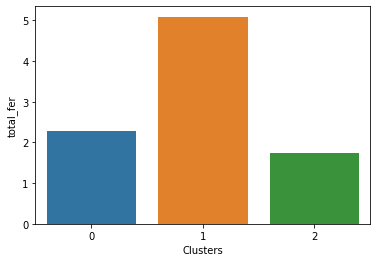

In [38]:
sns.barplot(x=df["Clusters"],y=df["total_fer"],ci=None)
## 0--> Developing Countries
## 1--> Underdeveloped Countries
## 2--> Developed Countries

In [39]:
df["Cluster_Tag"]=np.nan
df["Cluster_Tag"]=np.where(df["Clusters"]==0,"Developing Country",df["Cluster_Tag"])
df["Cluster_Tag"]=np.where(df["Clusters"]==1,"Underdeveloped Country",df["Cluster_Tag"])
df["Cluster_Tag"]=np.where(df["Clusters"]==2,"Developed Country",df["Cluster_Tag"])

In [41]:
df[df["Cluster_Tag"]=="Developed Country"]["country"]

7                 Australia
8                   Austria
15                  Belgium
23                   Brunei
29                   Canada
42                   Cyprus
43           Czech Republic
44                  Denmark
53                  Finland
54                   France
58                  Germany
60                   Greece
68                  Iceland
73                  Ireland
74                   Israel
75                    Italy
77                    Japan
82                   Kuwait
91               Luxembourg
98                    Malta
110             Netherlands
111             New Zealand
114                  Norway
122                Portugal
123                   Qatar
133               Singapore
135                Slovenia
138             South Korea
139                   Spain
144                  Sweden
145             Switzerland
157    United Arab Emirates
158          United Kingdom
159           United States
Name: country, dtype: object

In [43]:
pd.set_option("display.max_rows",400)
df[df["Cluster_Tag"]=="Developing Country"]["country"]

1                             Albania
2                             Algeria
4                 Antigua and Barbuda
5                           Argentina
6                             Armenia
9                          Azerbaijan
10                            Bahamas
11                            Bahrain
12                         Bangladesh
13                           Barbados
14                            Belarus
16                             Belize
18                             Bhutan
19                            Bolivia
20             Bosnia and Herzegovina
21                           Botswana
22                             Brazil
24                           Bulgaria
27                           Cambodia
30                         Cape Verde
33                              Chile
34                              China
35                           Colombia
39                         Costa Rica
41                            Croatia
45                 Dominican Republic
46          

In [45]:
df[df["Cluster_Tag"]=="Underdeveloped Country"]["country"]

0                   Afghanistan
3                        Angola
17                        Benin
25                 Burkina Faso
26                      Burundi
28                     Cameroon
31     Central African Republic
32                         Chad
36                      Comoros
37             Congo, Dem. Rep.
38                  Congo, Rep.
40                Cote d'Ivoire
49            Equatorial Guinea
50                      Eritrea
55                        Gabon
56                       Gambia
59                        Ghana
63                       Guinea
64                Guinea-Bissau
66                        Haiti
72                         Iraq
80                        Kenya
81                     Kiribati
84                          Lao
87                      Lesotho
88                      Liberia
93                   Madagascar
94                       Malawi
97                         Mali
99                   Mauritania
106                  Mozambique
108     